## Comment exécuter son code en Python ?
1. En écrivant un fichier `.py` et en l'exécutant depuis le terminal.
2. En tappant directement ses commandes dans la console
3. En utilisant un IDE/Editeur de texte et en exécutant tout un fichier
4. En utilisant un IDE/Edt et en exécutant des portions de code
5. En utilisant des notebooks jupyter et en exécutant des cellules séparément

En créant un binder ?

### Quel Python j'exécute ?

In [40]:
import sys

print(sys.executable)

/home/adrienpacifico/anaconda3/envs/pfds_new/bin/python


In [1]:
import sys

In [2]:
sys.implementation

namespace(name='cpython',
          cache_tag='cpython-38',
          version=sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0),
          hexversion=50858224,
          _multiarch='x86_64-linux-gnu')

In [3]:
sys.argv

['/home/adrienpacifico/anaconda3/envs/pfds_new/lib/python3.8/site-packages/ipykernel_launcher.py',
 '-f',
 '/home/adrienpacifico/.local/share/jupyter/runtime/kernel-3b2955a9-a926-4c53-84a9-2d4bc834f4d5.json']

In [4]:
file_o=open('/home/adrienpacifico/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py') 
content=file_o.read()
print(content)                     

"""Entry point for launching an IPython kernel.

This is separate from the ipykernel package so we can avoid doing imports until
after removing the cwd from sys.path.
"""

import sys

if __name__ == '__main__':
    # Remove the CWD from sys.path while we load stuff.
    # This is added back by InteractiveShellApp.init_path()
    if sys.path[0] == '':
        del sys.path[0]

    from ipykernel import kernelapp as app
    app.launch_new_instance()



In [5]:
file_o=open('/home/adrienpacifico/.local/share/jupyter/runtime/kernel-d48813bb-e3ba-4f59-8873-e2f88900f297.json') 
content=file_o.read()
print(content)                     

FileNotFoundError: [Errno 2] No such file or directory: '/home/adrienpacifico/.local/share/jupyter/runtime/kernel-d48813bb-e3ba-4f59-8873-e2f88900f297.json'

### Installer une librairie

Aller dans la console dans son environnement virtuel et lancer la commande

`pip -m install nom_du_package`

Pourquoi `-m` la réponse est ici (surtout si vous êtes sous Windows) : https://snarky.ca/why-you-should-use-python-m-pip/

In [6]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I learned sometime ago that we should be doing<br>`python -m pip install ...` instead of simply `pip install ...` but now I can&#39;t remember the source of this information. Likely from <a href="https://twitter.com/brettsky?ref_src=twsrc%5Etfw">@brettsky</a> or <a href="https://twitter.com/zooba?ref_src=twsrc%5Etfw">@zooba</a>, any of you have a talk/blog post on this, so I can share with people?</p>&mdash; Mariatta 🤦 (@mariatta) <a href="https://twitter.com/mariatta/status/1189243515739561985?ref_src=twsrc%5Etfw">October 29, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

In [7]:
import pandas as pd

In [8]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

### Ipython

Tutoriel Ipython : https://github.com/ipython/ipython-in-depth/tree/7e5ce96cc9251083979efdfc393425f1229a4a68

Ipython vient avec des commandes magiques !

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [9]:
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [10]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

`%%time` va permettre de savoir en combien de temps s'exécute une commande

In [17]:
%%time
for a in range(10**7):
    a*3
    

CPU times: user 513 ms, sys: 0 ns, total: 513 ms
Wall time: 512 ms


`%%timeit` va permettre de savoir en combien de temps en moyenne une commande s'exécute.

In [18]:
%%timeit
for a in range(10**7):
    a*3
    

345 ms ± 9.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


`!` permet d'excuter des commandes du shell

In [19]:
!pwd

/home/adrienpacifico/Projects/cours/python_for_data_science/python


In [10]:
!ls

 0-Mettre_en_place_son_environnement_jupyter.ipynb
 1-python_introduction.ipynb
 2-zen_of_python.ipynb
 3-load_modules.ipynb
 4-Functions.ipynb
 5-View_vs_copy.ipynb
 6-assert_et_try_except.ipynb
 7-os.ipynb
 8-booléen_et_operateurs.ipynb
 data
'?-sets.ipynb'


In [22]:
!ping googlglggle.com

ping: googlglggle.com: Nom ou service inconnu


In [23]:
!ifconfig

lo: flags=73<UP,LOOPBACK,RUNNING>  mtu 65536
        inet 127.0.0.1  netmask 255.0.0.0
        inet6 ::1  prefixlen 128  scopeid 0x10<host>
        loop  txqueuelen 1000  (Boucle locale)
        RX packets 15487177  bytes 3597070117 (3.5 GB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 15487177  bytes 3597070117 (3.5 GB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

wlp0s20f3: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet 192.168.203.63  netmask 255.255.255.0  broadcast 192.168.203.255
        inet6 fe80::f51c:5098:949b:da81  prefixlen 64  scopeid 0x20<link>
        inet6 2a04:cec0:11a9:e7b9:d475:7ff:f086:fe91  prefixlen 64  scopeid 0x0<global>
        inet6 2a04:cec0:11a9:e7b9:8aaa:66e3:cd38:44b3  prefixlen 64  scopeid 0x0<global>
        ether 34:2e:b7:f3:ed:46  txqueuelen 1000  (Ethernet)
        RX packets 4813295  bytes 5109493856 (5.1 GB)
        RX errors 0  dropped 3  overruns 0  frame 0
        TX packets 2248

La commande `?`

In [21]:
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [24]:
import time

In [25]:
time?

Type:        module
String form: <module 'time' (built-in)>
Docstring:  
This module provides various functions to manipulate time values.

There are two standard representations of time.  One is the number
of seconds since the Epoch, in UTC (a.k.a. GMT).  It may be an integer
or a floating point number (to represent fractions of seconds).
The Epoch is system-defined; on Unix, it is generally January 1st, 1970.
The actual value can be retrieved by calling gmtime(0).

The other representation is a tuple of 9 integers giving local time.
The tuple items are:
  year (including century, e.g. 1998)
  month (1-12)
  day (1-31)
  hours (0-23)
  minutes (0-59)
  seconds (0-59)
  weekday (0-6, Monday is 0)
  Julian day (day in the year, 1-366)
  DST (Daylight Savings Time) flag (-1, 0 or 1)
If the DST flag is 0, the time is given in the regular time zone;
if it is 1, the time is given in the DST time zone;
if it is -1, mktime() should guess based on the date and time.


In [24]:
time.daylight?

Type:        int
String form: 1
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


In [ ]:
time.daylight

In [ ]:
time.daylight()

### Output history

In [26]:
2+10

12

In [29]:
_ + 5

17

In [30]:
%history -n 1-5

   1: import sys
   2: sys.implementation
   3: sys.argv
   4:
file_o=open('/home/adrienpacifico/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py') 
content=file_o.read()
print(content)
   5:
file_o=open('/home/adrienpacifico/.local/share/jupyter/runtime/kernel-d48813bb-e3ba-4f59-8873-e2f88900f297.json') 
content=file_o.read()
print(content)


In [4]:
_i

'%history -n 1-5'

In [7]:
_

'[]'

In [2]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [32]:
%env

{'SHELL': '/bin/bash',
 'SESSION_MANAGER': 'local/pop-os:@/tmp/.ICE-unix/3815,unix/pop-os:/tmp/.ICE-unix/3815',
 'QT_ACCESSIBILITY': '1',
 'COLORTERM': 'truecolor',
 'XDG_CONFIG_DIRS': '/etc/xdg/xdg-pop:/etc/xdg',
 'XDG_MENU_PREFIX': 'gnome-',
 'GNOME_DESKTOP_SESSION_ID': 'this-is-deprecated',
 'GTK_IM_MODULE': 'ibus',
 'CONDA_EXE': '/home/adrienpacifico/anaconda3/bin/conda',
 '_CE_M': '',
 'LANGUAGE': 'fr_FR:en',
 'MANDATORY_PATH': '/usr/share/gconf/pop.mandatory.path',
 'LC_ADDRESS': 'fr_FR.UTF-8',
 'GNOME_SHELL_SESSION_MODE': 'pop',
 'LC_NAME': 'fr_FR.UTF-8',
 'SSH_AUTH_SOCK': '/run/user/1000/keyring/ssh',
 'XMODIFIERS': '@im=ibus',
 'DESKTOP_SESSION': 'pop',
 'LC_MONETARY': 'fr_FR.UTF-8',
 'SSH_AGENT_PID': '3785',
 'GTK_MODULES': 'gail:atk-bridge:appmenu-gtk-module',
 'PWD': '/home/adrienpacifico/Projects/cours/python_for_data_science',
 'LOGNAME': 'adrienpacifico',
 'XDG_SESSION_DESKTOP': 'pop',
 'XDG_SESSION_TYPE': 'x11',
 'CONDA_PREFIX': '/home/adrienpacifico/anaconda3/envs/pyth

### Le debugger (ipdb)

In [33]:
import matplotlib.pyplot as plt

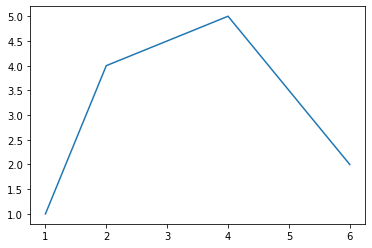

In [34]:
plt.plot([1,2,4,6], [1,4,5,2])

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

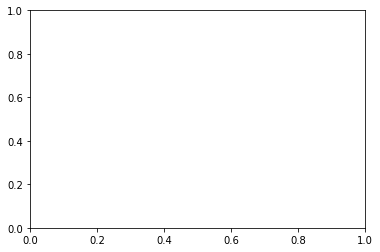

In [38]:
plt.plot([1,2,4,6], [1,4,5,2, 8], )

In [36]:
%debug

> /home/adrienpacifico/anaconda3/envs/pfds_new/lib/python3.8/site-packages/matplotlib/axes/_base.py(501)_plot_args()
    499 
    500         if x.shape[0] != y.shape[0]:
--> 501             raise ValueError(f"x and y must have same first dimension, but "
    502                              f"have shapes {x.shape} and {y.shape}")
    503         if x.ndim > 2 or y.ndim > 2:



ipdb>  u


> /home/adrienpacifico/anaconda3/envs/pfds_new/lib/python3.8/site-packages/matplotlib/axes/_base.py(315)__call__()
    313                 this += args[0],
    314                 args = args[1:]
--> 315             yield from self._plot_args(this, kwargs)
    316 
    317     def get_next_color(self):



ipdb>  args


self = <matplotlib.axes._base._process_plot_var_args object at 0x7fbc596d6f40>
data = None
args = []
kwargs = {}


ipdb>  type(args)


<class 'list'>


ipdb>  self


ipdb>  quit


In [46]:
import pdb

In [47]:
pdb.set_trace()

--Call--
> /home/adrienpacifico/.local/lib/python3.8/site-packages/IPython/core/displayhook.py(252)__call__()
    250         sys.stdout.flush()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.
    254 



ipdb>  u


> <ipython-input-47-54799d9a0260>(1)<module>()
----> 1 pdb.set_trace()



ipdb>  u


*** all frames above hidden


ipdb>  d


> /home/adrienpacifico/.local/lib/python3.8/site-packages/IPython/core/displayhook.py(252)__call__()
    250         sys.stdout.flush()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.
    254 



ipdb>  d


*** Newest frame
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
